In [16]:
import IPython
import os
import speechpy
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import numpy as np

In [2]:
basepath = "/home/jovyan/dataset/voxceleb/vox/dev-wav/"

In [4]:
dirs = os.listdir(basepath)
print("# of speakers' cases: ",len(dirs))
print("Egs of dir:",dirs[0])

# of speakers' cases:  16223
Egs of dir: id01972-5_Xtip_pZ5s


In [44]:
path1 = os.path.join(basepath,dirs[0])
path2 = os.path.join(basepath,dirs[1])
path1 = "output3.wav"
print(path1,path2)

output3.wav /home/jovyan/dataset/voxceleb/vox/dev-wav/id01139-apUaBAqYp2w


In [37]:
path1 = os.path.join(path1,os.listdir(path1)[0])
path2 = os.path.join(path2,os.listdir(path2)[0])

In [45]:
IPython.display.Audio(filename=path1)

In [39]:
IPython.display.Audio(filename=path2)

In [49]:
fs,signal = wav.read(path1)
print(signal.shape)
print(signal)
signal=signal[:,0]
print(signal.shape)


logenergy = speechpy.feature.lmfe(signal, sampling_frequency=fs, frame_length=0.020, frame_stride=0.01,
             num_filters=5000, fft_length=512, low_frequency=0)
logenergy_feature_cube = speechpy.feature.extract_derivative_feature(logenergy)

(143360, 2)
[[ 0  0]
 [ 0  0]
 [ 0  0]
 ...
 [ 0  0]
 [ 0  0]
 [ 0 -1]]
(143360,)


In [50]:
print (logenergy_feature_cube.shape)
print (logenergy_feature_cube)

(296, 5000, 3)
[[[-36.04365339 -10.81309602  -3.24392881]
  [-36.04365339 -10.81309602  -3.24392881]
  [-36.04365339 -10.81309602  -3.24392881]
  ...
  [-36.04365339 -10.81309602  -3.24392881]
  [-36.04365339 -10.81309602  -3.24392881]
  [-36.04365339 -10.81309602  -3.24392881]]

 [[-36.04365339 -10.81309602  -3.24392881]
  [-36.04365339 -10.81309602  -3.24392881]
  [-36.04365339 -10.81309602  -3.24392881]
  ...
  [-36.04365339 -10.81309602  -3.24392881]
  [-36.04365339 -10.81309602  -3.24392881]
  [-36.04365339 -10.81309602  -3.24392881]]

 [[-36.04365339 -10.81309602  -3.24392881]
  [-36.04365339 -10.81309602  -3.24392881]
  [-36.04365339 -10.81309602  -3.24392881]
  ...
  [-36.04365339 -10.81309602  -3.24392881]
  [-36.04365339 -10.81309602  -3.24392881]
  [-36.04365339 -10.81309602  -3.24392881]]

 ...

 [[-36.04365339 -10.81309602  -3.24392881]
  [-36.04365339 -10.81309602  -3.24392881]
  [-36.04365339 -10.81309602  -3.24392881]
  ...
  [-36.04365339  -2.94663541   0.29597847]
  [

/home/jovyan/keras-py3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:7674: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


(array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         6.77710625e-02, 7.30787304e-03, 1.91360625e-06],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         5.97184425e-02, 8.11777088e-03, 2.77283590e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         9.50443819e-02, 7.45340183e-03, 1.56381730e-05],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.57884532e-05, 6.02474983e-06, 3.64292546e-06],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.75807815e-06, 1.51847186e-05, 2.20810905e-06],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         6.83770437e-07, 4.93398850e-07, 1.01847191e-08]]),
 array([    0. ,   187.5,   375. ,   562.5,   750. ,   937.5,  1125. ,
         1312.5,  1500. ,  1687.5,  1875. ,  2062.5,  2250. ,  2437.5,
         2625. ,  2812.5,  3000. ,  3187.5,  3375. ,  3562.5,  3750. ,
         3937.5,  4125. ,  4312.5,  4500. ,  4687.5,

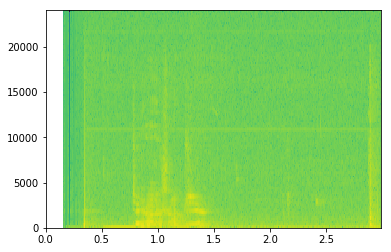

In [58]:
# log_norm = np.linalg.norm(logenergy_feature_cube,axis=-1)
# print(log_norm.transpose().shape)
# plt.imshow(log_norm.transpose()[:,10:210])
# plt.show()
plt.specgram(signal, Fs=fs)